#Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#Loading the Dataset

In [2]:
df = pd.read_csv('/content/heart_disease.csv')

#Checking DataFrame Dimensions

In [4]:
df.shape

(1025, 14)

#DataFrame Overview, Statistical Summary, and Missing Value Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [ ]:
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

#Exploratory Data Analysis (EDA)

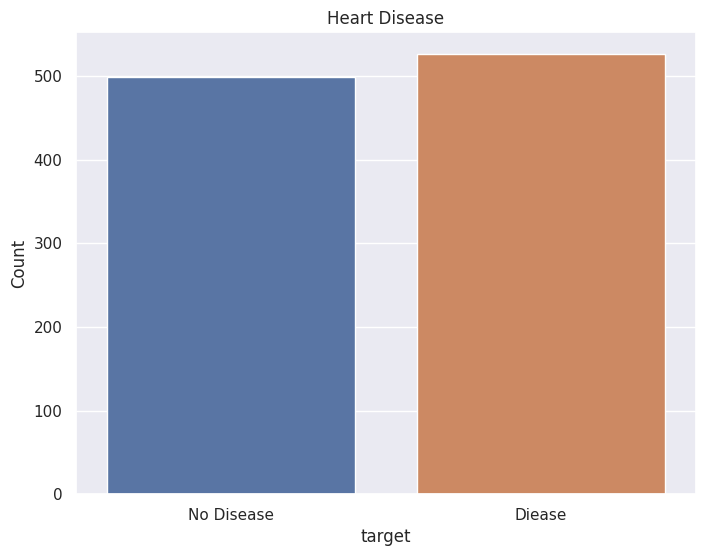

In [ ]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x='target', data=df)
plt.ylabel('Count')
plt.title('Heart Disease')
ax.set_xticklabels(['No Disease', 'Diease'])
plt.show()

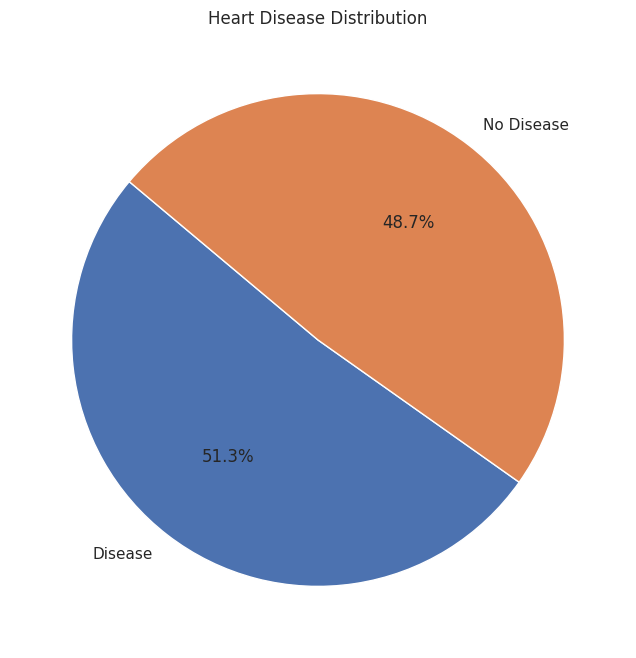

In [12]:
class_counts = df['target'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=['Disease', 'No Disease'], autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Distribution')
plt.show()

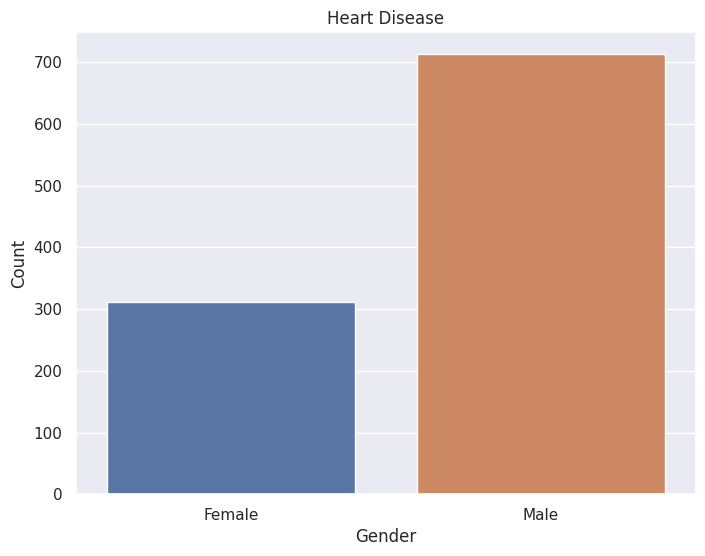

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=df)
plt.ylabel('Count')
plt.title('Heart Disease')
ax.set_xticklabels(['Female', 'Male'])
plt.xlabel('Gender')
plt.show()

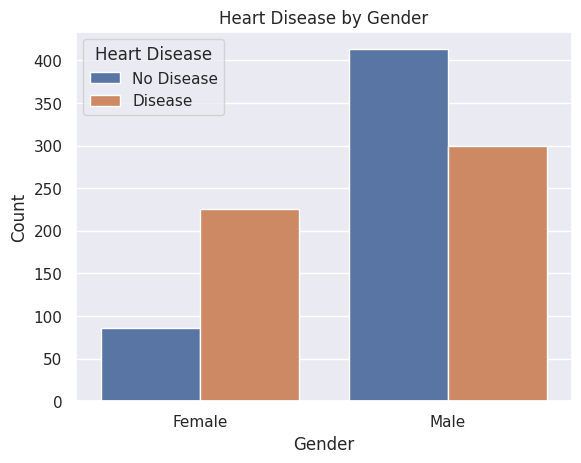

In [ ]:
ax= sns.countplot(x='sex', hue='target', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Heart Disease by Gender')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
ax.set_xticklabels(['Female', 'Male'])
plt.show()

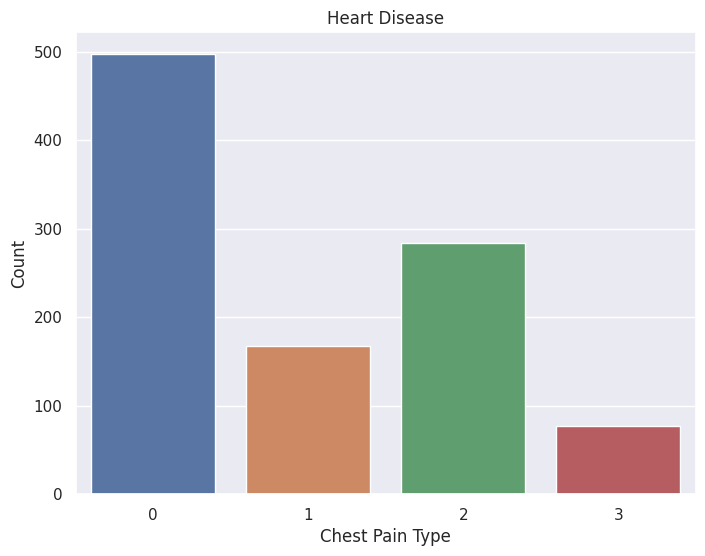

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='cp', data=df)
plt.ylabel('Count')
plt.title('Heart Disease')
plt.xlabel('Chest Pain Type')
plt.show()

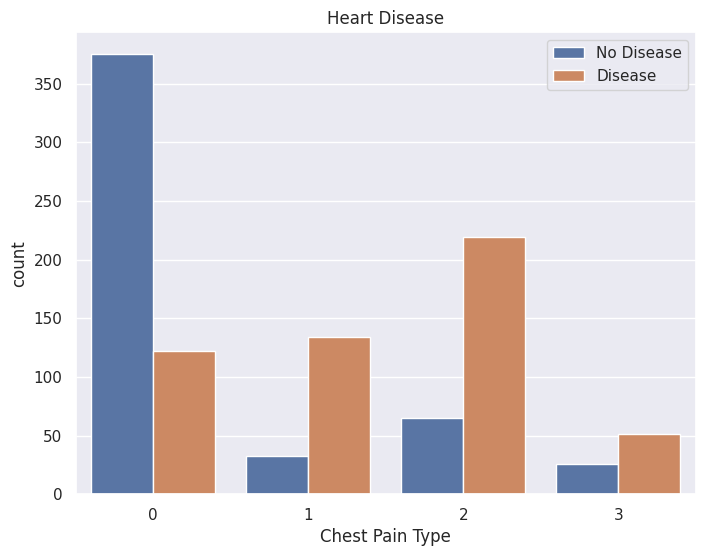

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='cp',hue='target',data=df)
plt.title('Heart Disease')
plt.legend(labels=['No Disease','Disease'])
plt.xlabel('Chest Pain Type')
plt.show()

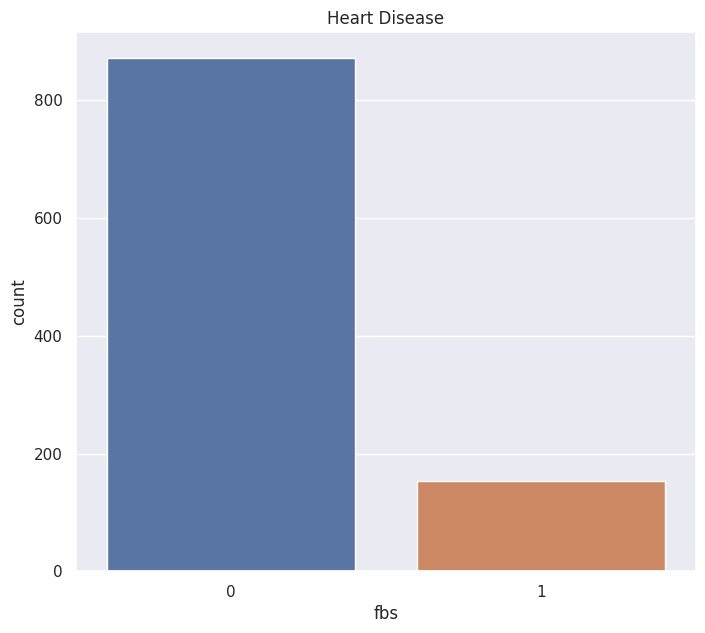

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x='fbs',data=df)
plt.title('Heart Disease')
plt.show()

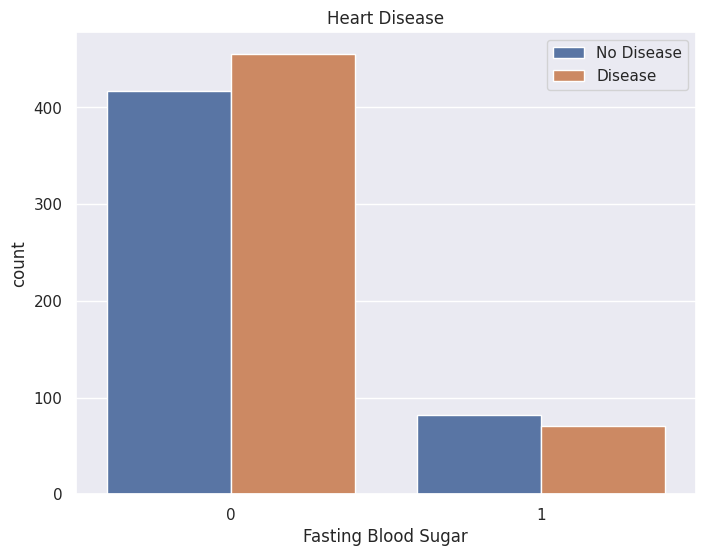

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='fbs',hue='target',data=df)
plt.title('Heart Disease')
plt.legend(labels=['No Disease','Disease'])
plt.xlabel('Fasting Blood Sugar')
plt.show()

Text(0.5, 1.0, 'Heart Disease')

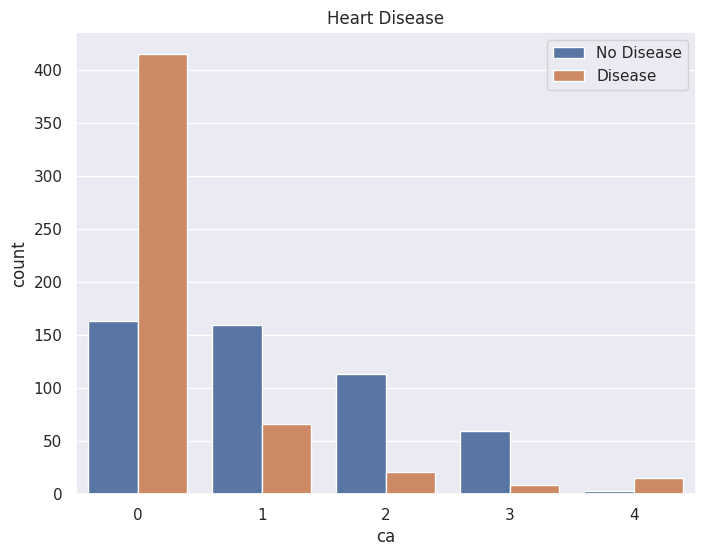

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'ca', hue = 'target')
plt.legend(labels=['No Disease','Disease'])
plt.title('Heart Disease')

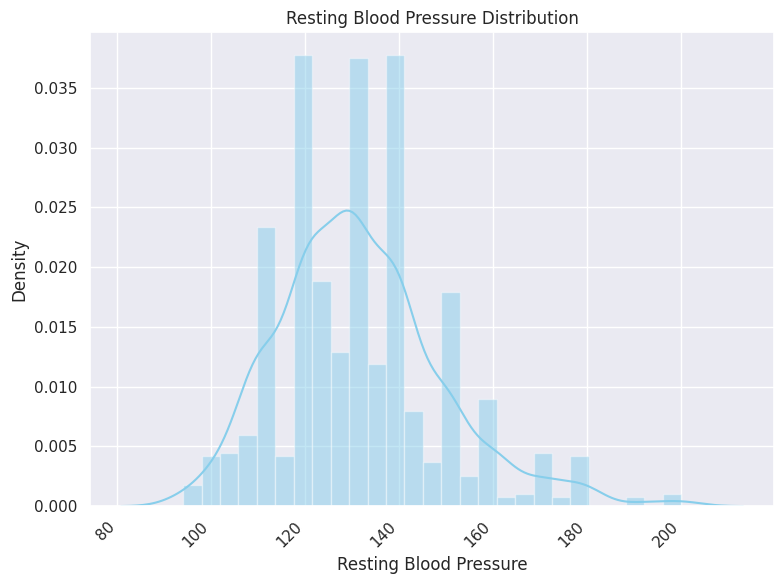

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='trestbps',
    edgecolor=(1, 1, 1, .4),
    kde=True,stat="density",
    kde_kws=dict(cut=3),
    color='skyblue'
)
plt.xlabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

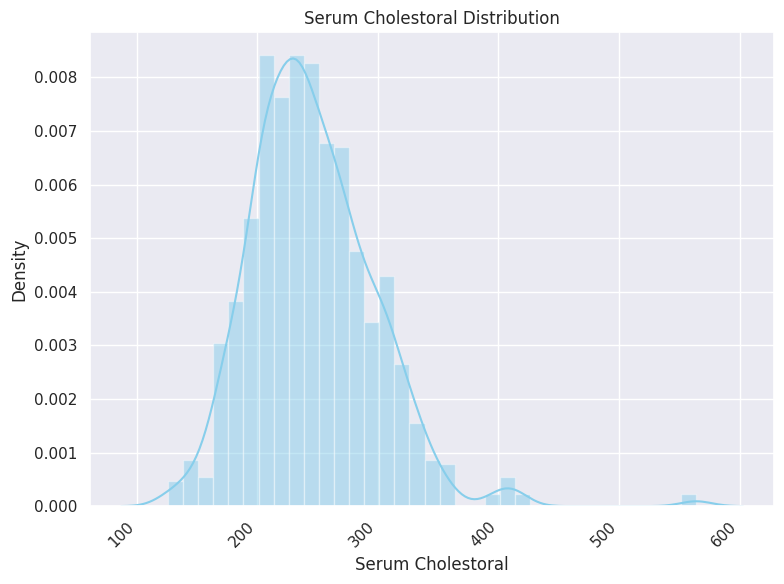

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='chol',
    edgecolor=(1, 1, 1, .4),
    kde=True,stat="density",
    kde_kws=dict(cut=3),
    color='skyblue'
)
plt.xlabel('Serum Cholestoral')
plt.title('Serum Cholestoral Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

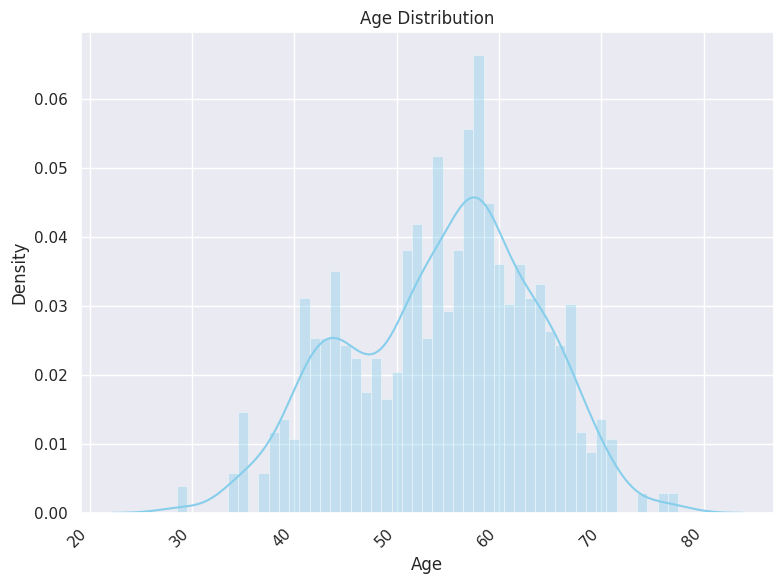

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='age',
    edgecolor=(1, 1, 1, .4),
    discrete=True,alpha=.4,
    kde=True,stat="density",
    kde_kws=dict(cut=3),
    color='skyblue'
)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

[Text(0, 0, 'No Disease'), Text(1, 0, 'Diease')]

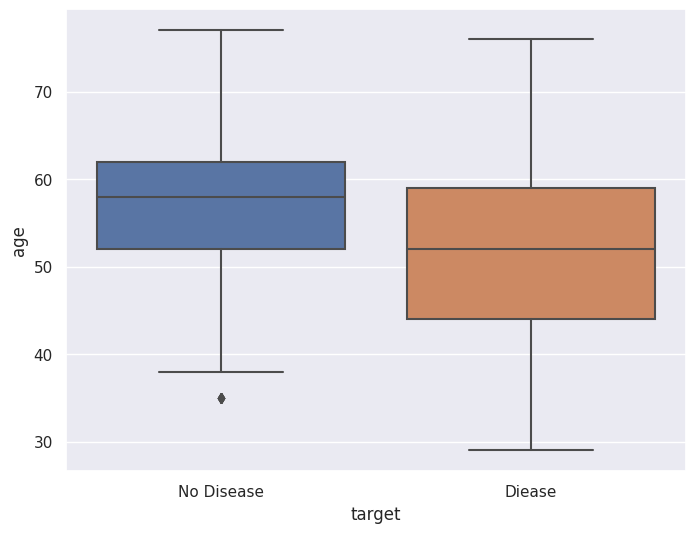

In [ ]:
plt.figure(figsize = (8, 6))
ax= sns.boxplot(y = df['age'], x = df['target'])
ax.set_xticklabels(['No Disease', 'Diease'])

[Text(0, 0, 'No Disease'), Text(1, 0, 'Diease')]

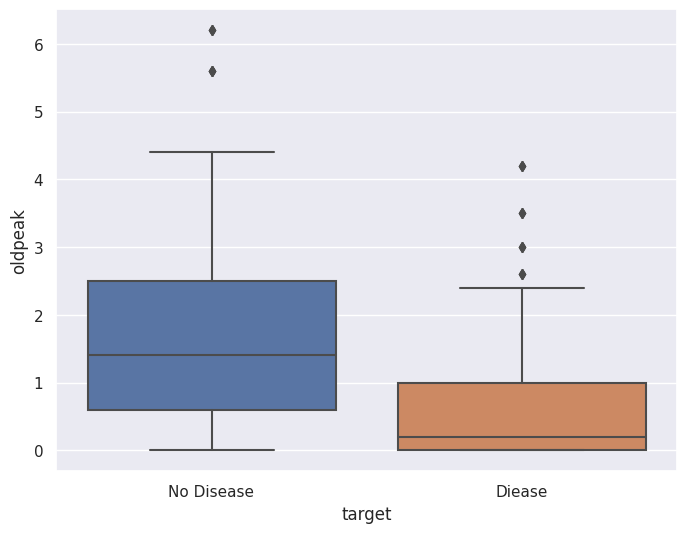

In [ ]:
plt.figure(figsize = (8, 6))
ax= sns.boxplot(y = df['oldpeak'], x = df['target'])
ax.set_xticklabels(['No Disease', 'Diease'])

[Text(0, 0, 'No Disease'), Text(1, 0, 'Diease')]

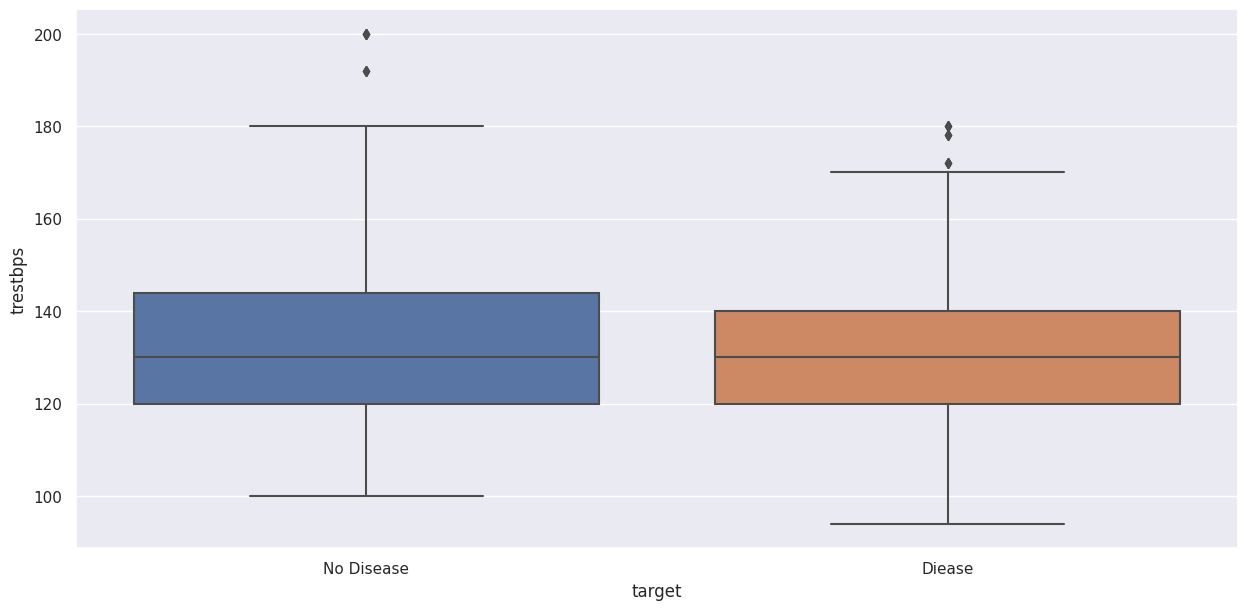

In [ ]:
plt.figure(figsize = (15, 7))
ax= sns.boxplot(y = df['trestbps'], x = df['target'])
ax.set_xticklabels(['No Disease', 'Diease'])

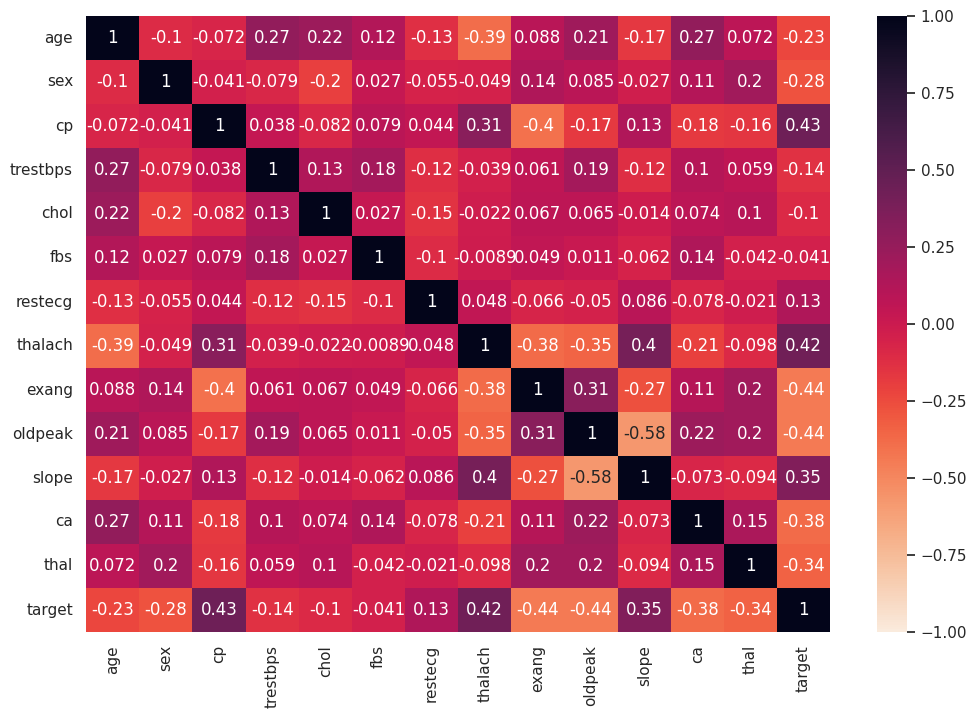

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True,cmap="rocket_r", ax=ax)
plt.show()

#Preprocessing and Feature Scaling for Modeling





In [ ]:
df2=df['target']
df.drop('target', axis=1, inplace=True)
cols= df.columns

In [ ]:
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=cols)

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [ ]:
df2

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

#Splitting Data into Training and Testing Sets

In [ ]:
X= df
Y= df2

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(820, 13) (205, 13)


#Machine Learning Models

##Hyperparameter Tuning and Evaluation of Logistic Regression Model

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'max_iter': [100, 500, 1000],
}

lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

lr = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    max_iter=best_params['max_iter'],
)

lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred) * 100
classification_rep = classification_report(Y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Accuracy : 79.51%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Text(91.25, 0.5, 'Actual values')

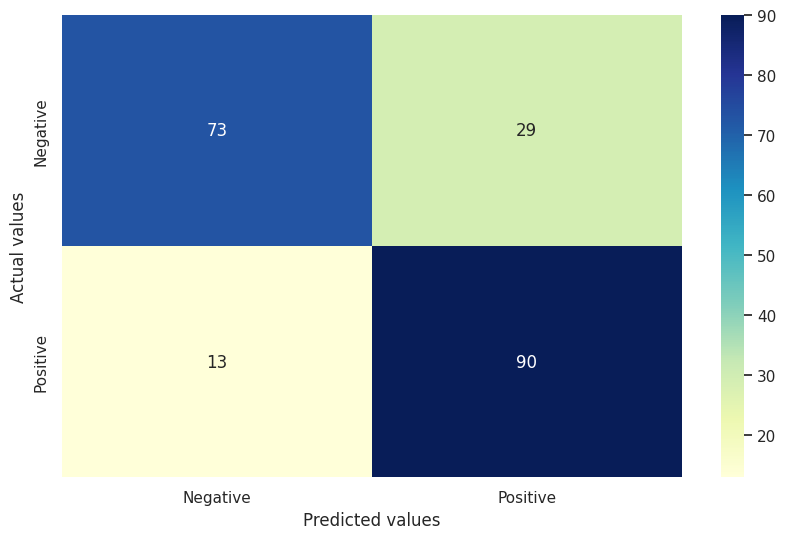

In [ ]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Support Vector Classifier(SVC) Model

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svmc = SVC()

grid_search = GridSearchCV(svmc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

svmc = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    gamma=best_params['gamma']
)
svmc.fit(X_train, Y_train)
y_pred2 = svmc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred2) * 100
classification_rep = classification_report(Y_test, y_pred2)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy : 97.56%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



Text(91.25, 0.5, 'Actual values')

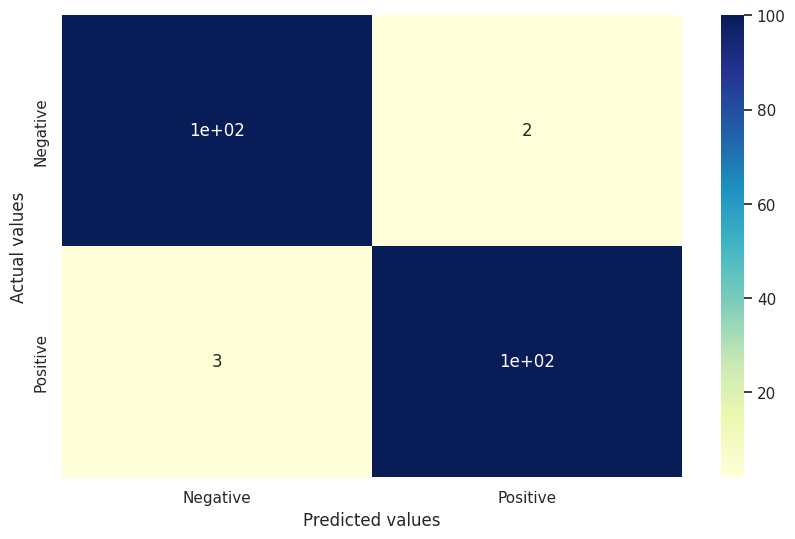

In [ ]:
cm = confusion_matrix(Y_test, y_pred2)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Random Forest Classifier Model

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

rfc = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42,
    class_weight='balanced'
)

rfc.fit(X_train, Y_train)
y_pred3 = rfc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred3) * 100
classification_rep = classification_report(Y_test, y_pred3)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy : 98.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(91.25, 0.5, 'Actual values')

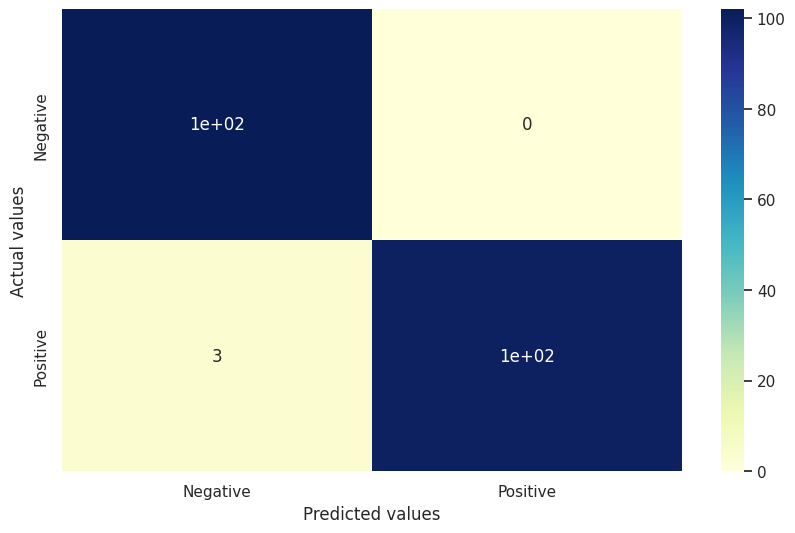

In [ ]:
cm = confusion_matrix(Y_test, y_pred3)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of Gradient Boosting Classifier Model

In [ ]:
gbc = GradientBoostingClassifier(random_state=42, verbose=1)

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(gbc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

gbc = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    random_state=42,
    verbose=1
)

gbc.fit(X_train, Y_train)
y_pred4 = gbc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred4) * 100
classification_rep = classification_report(Y_test, y_pred4)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

      Iter       Train Loss   Remaining Time 
         1           1.0522            0.57s
         2           0.8185            0.63s
         3           0.6515            0.63s
         4           0.5231            0.60s
         5           0.4223            0.80s
         6           0.3485            0.83s
         7           0.2796            0.81s
         8           0.2248            0.81s
         9           0.1814            0.79s
        10           0.1470            0.77s
        20           0.0194            0.61s
        30           0.0026            0.54s
        40           0.0004            0.45s
        50           0.0000            0.37s
        60           0.0000            0.29s
        70           0.0000            0.22s
        80           0.0000            0.14s
        90           0.0000            0.07s
       100           0.0000            0.00s
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
      Iter       

Text(91.25, 0.5, 'Actual values')

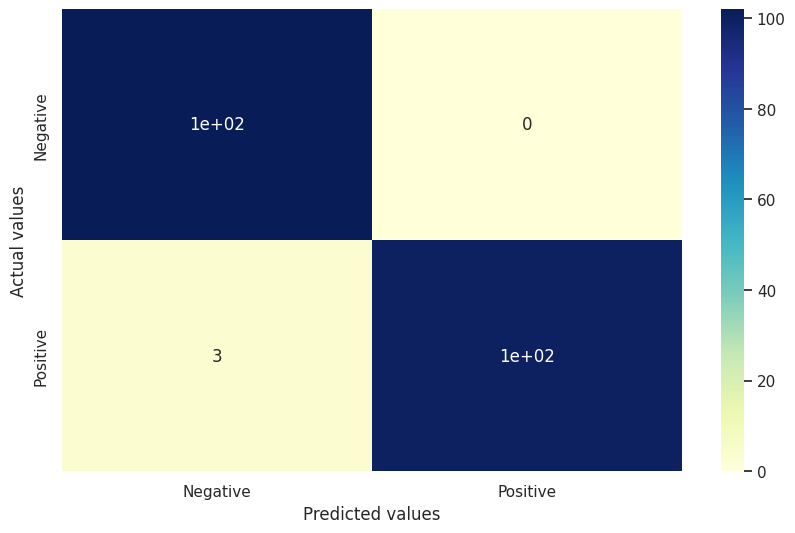

In [ ]:
cm = confusion_matrix(Y_test, y_pred4)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Evaluation of Voting Classifier Model

In [ ]:
gbc = GradientBoostingClassifier(learning_rate= 0.2, max_depth= 7, n_estimators= 100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
rfc= RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200, random_state=42)
lr = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', n_jobs=-1)
svc = SVC(probability=True, C= 10, gamma= 'scale', kernel= 'rbf')

ec = VotingClassifier(estimators=[
    ('Random Forest', rfc),
    ('Logistic Regression', lr),
    ('Support Vector Machine', svc),
    ('Gradient Boosting', gbc),
    ('K-Nearest Neighbors', knn)
], voting='soft', weights=[1, 1, 1, 1, 1])

ec.fit(X_train, Y_train)
y_pred5 = ec.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred5) * 100
classification_rep = classification_report(Y_test, y_pred5)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Accuracy : 98.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(91.25, 0.5, 'Actual values')

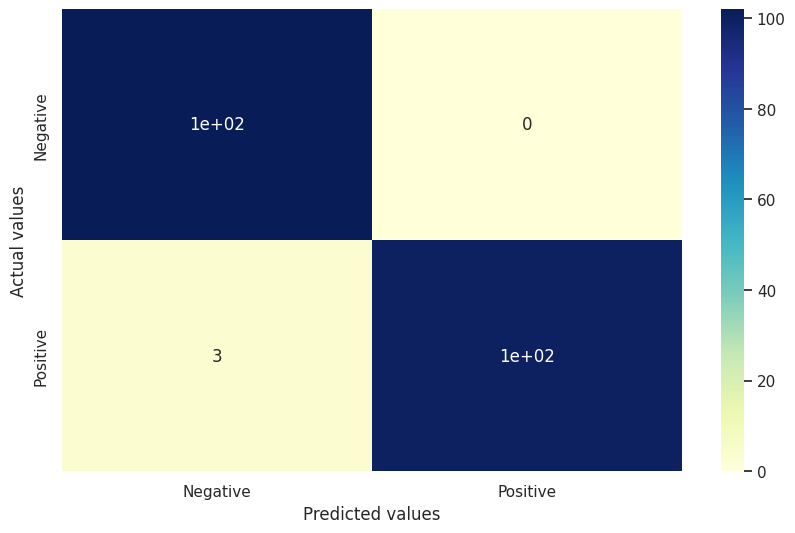

In [ ]:
cm = confusion_matrix(Y_test, y_pred5)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of AdaBoost Classifier Model

In [ ]:
rfc = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200, random_state=42)
abc = AdaBoostClassifier(estimator=rfc, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.1, 0.2, 0.3, 0.5],
}

grid_search = GridSearchCV(abc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

abc = AdaBoostClassifier(
    estimator=rfc,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

abc.fit(X_train, Y_train)

y_pred6 = abc.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred6) * 100
classification_rep = classification_report(Y_test, y_pred6)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy : 98.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(91.25, 0.5, 'Actual values')

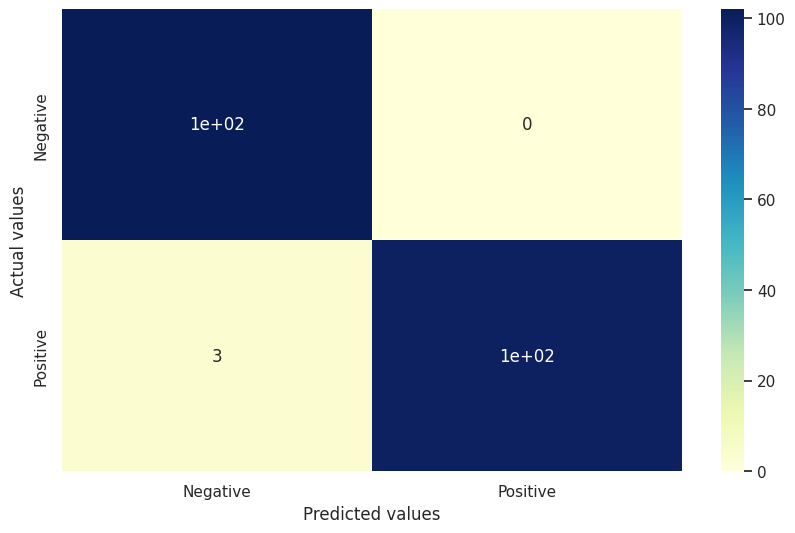

In [ ]:
cm = confusion_matrix(Y_test, y_pred6)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Hyperparameter Tuning and Evaluation of XGBoost Classifier Model

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

xgb = xgb.XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators']
)

xgb.fit(X_train, Y_train)

y_pred7 = xgb.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred7) * 100
classification_rep = classification_report(Y_test, y_pred7)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy : 98.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(91.25, 0.5, 'Actual values')

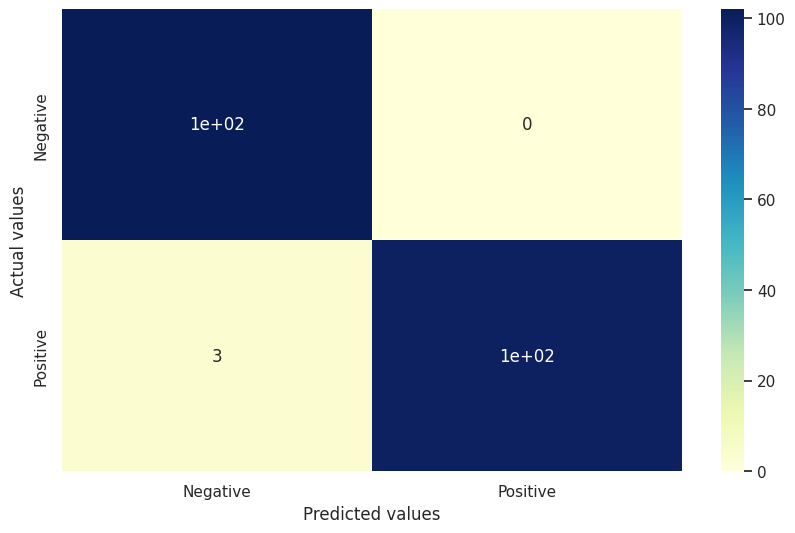

In [ ]:
cm = confusion_matrix(Y_test, y_pred7)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Deep Learning Models

##1D Convolutional Neural Network (CNN) Training and Evaluation

In [ ]:
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

model_cnn = Sequential()

model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(13, 1)))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv1D(128, 3, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Dropout(0.2))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_cnn.summary())

start_time = time.time()

model_history = model_cnn.fit(X_train_cnn, Y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=2)

training_time = time.time() - start_time
print("Training Time: {:.2f} seconds".format(training_time))

score = model_cnn.evaluate(X_test_cnn, Y_test, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 11, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 64)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 128)            24704     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 1, 128)           

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

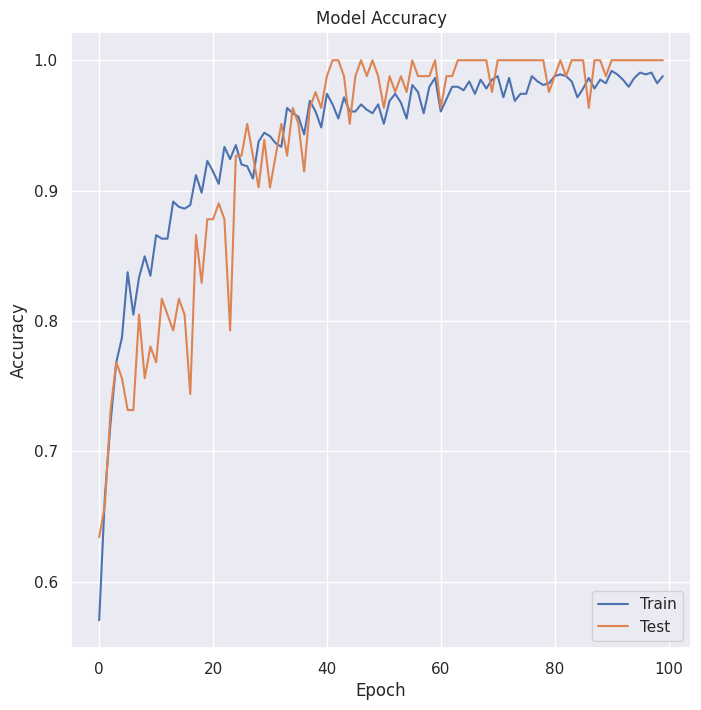

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

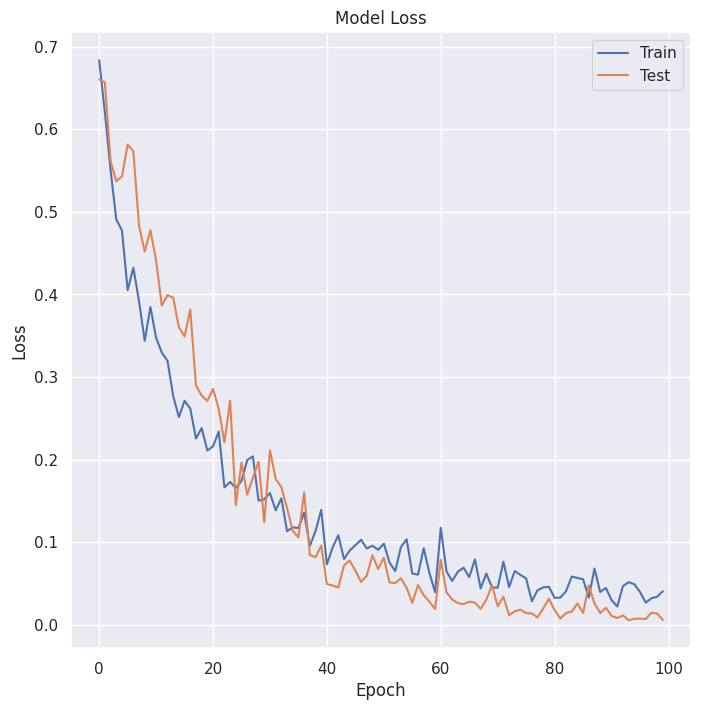

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
y_pred8= model_cnn.predict(X_test_cnn)
y_pred8 = (y_pred8 > 0.5).astype(int)

7/7 [==============================] - 0s 5ms/step


In [ ]:
classification_rep = classification_report(Y_test, y_pred8)

print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(91.25, 0.5, 'Actual values')

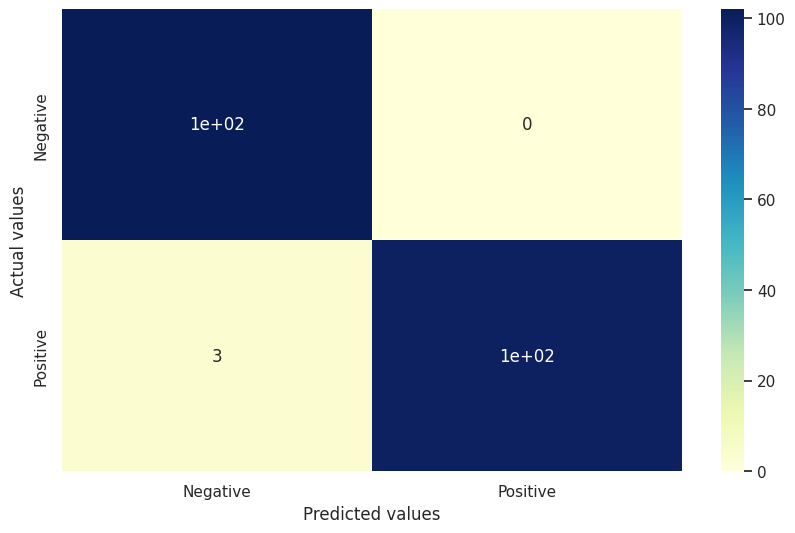

In [ ]:
cm = confusion_matrix(Y_test, y_pred8)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

##Deep Neural Network (DNN) Training and Evaluation

In [ ]:
model_dnn = Sequential()

model_dnn.add(Dense(128, input_shape=(13,), activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(256, activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(512, activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(1024, activation='relu'))
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(1, activation='sigmoid'))

model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_dnn.summary())

start_time = time.time()

history = model_dnn.fit(X_train, Y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=2)

training_time = time.time() - start_time
print("\nTraining Time: {:.2f} seconds".format(training_time))

score = model_dnn.evaluate(X_test, Y_test, verbose=0)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1792      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 256)              

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

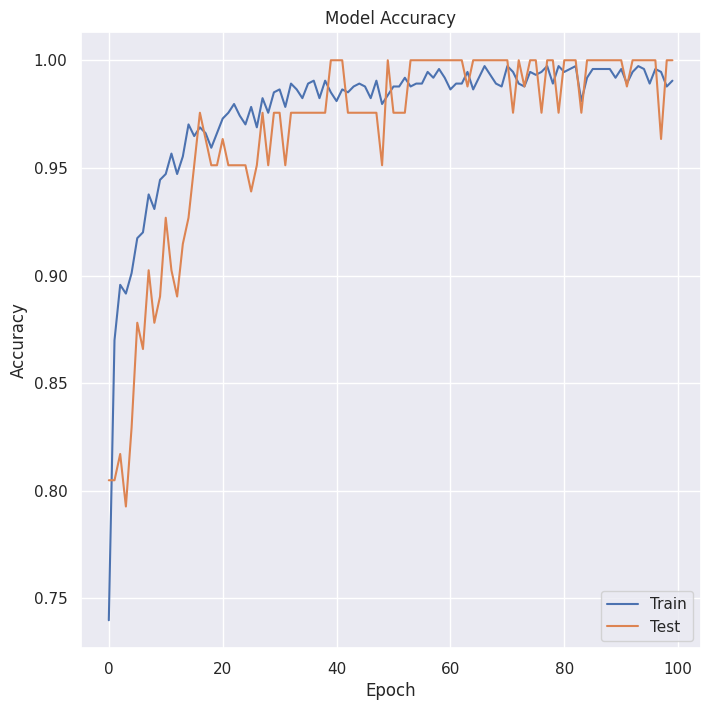

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

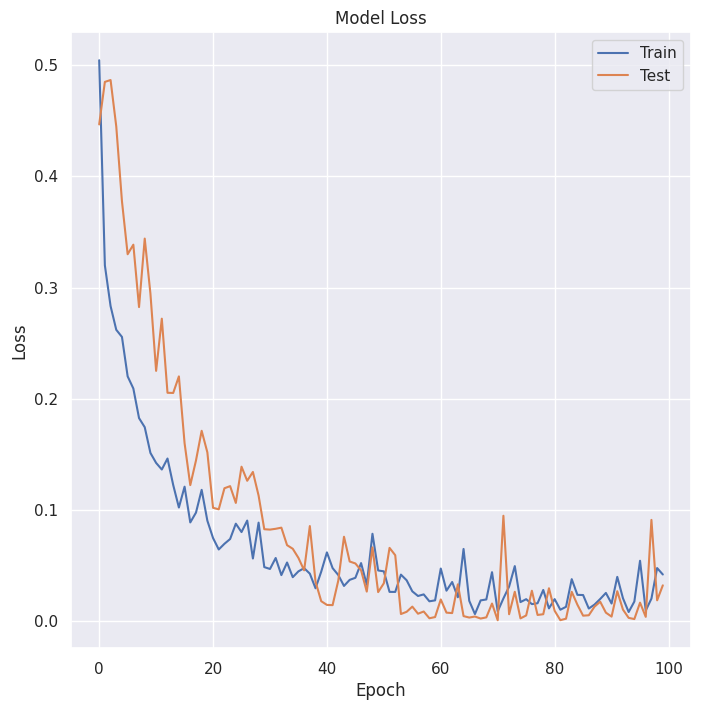

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
y_pred9= model_dnn.predict(X_test_cnn)
y_pred9 = (y_pred9 > 0.5).astype(int)

7/7 [==============================] - 0s 4ms/step


In [ ]:
classification_rep = classification_report(Y_test, y_pred9)

print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Text(91.25, 0.5, 'Actual values')

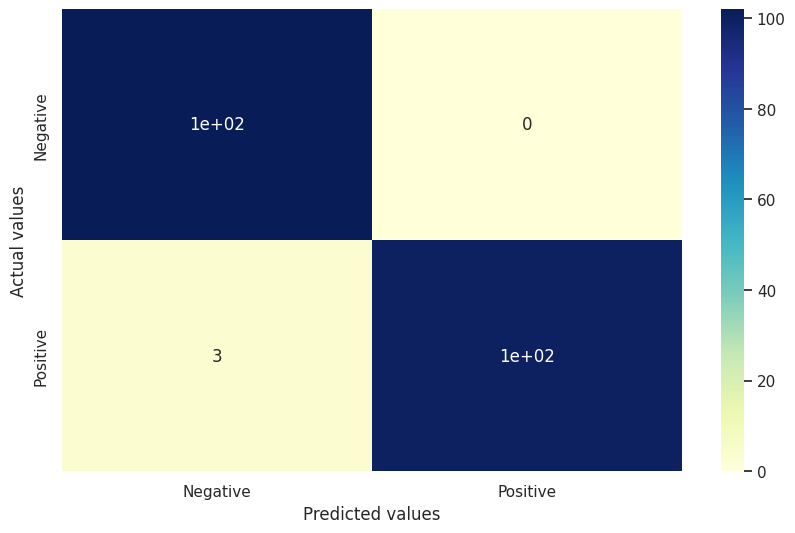

In [ ]:
cm = confusion_matrix(Y_test, y_pred8)

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')